In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("data/raw/alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
df.drop(columns=['DoctorInCharge', 'PatientID'], inplace=True)

## Analisis

In [5]:
df.shape

(2149, 33)

In [6]:
diagnosis_counts = df['Diagnosis'].value_counts()
print(diagnosis_counts)

Diagnosis
0    1389
1     760
Name: count, dtype: int64


### Columnas con strings
Solo 1 posee string DoctorInCharge

In [7]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns

Index([], dtype='object')

### Columnas numericas
Casi todas

In [8]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

### Columnas continuas o discretas

In [9]:
continuous_columns = df.select_dtypes(include=['float']).columns
discrete_columns = df.select_dtypes(include=['int']).columns

print("Continuous columns:", continuous_columns)
print("Discrete columns:", discrete_columns)

Continuous columns: Index(['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'],
      dtype='object')
Discrete columns: Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
       'Diagnosis'],
      dtype='object')


### Columnas categoricas

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() + [col for col in df.select_dtypes(include=['int']).columns if df[col].nunique() < 5]
categorical_columns

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

In [11]:
df[categorical_columns]

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2145,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2146,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2147,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


### Columnas no categoricas

In [12]:
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
non_categorical_columns

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

In [13]:
df[non_categorical_columns].describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


### Frecuencias

In [14]:
for col in categorical_columns:
    print(f"Análisis de la variable '{col}':")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")

Análisis de la variable 'Gender':
Gender
1    1088
0    1061
Name: count, dtype: int64
Gender
1    50.628199
0    49.371801
Name: proportion, dtype: float64


Análisis de la variable 'Ethnicity':
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
Ethnicity
0    59.469521
1    21.126105
3     9.818520
2     9.585854
Name: proportion, dtype: float64


Análisis de la variable 'EducationLevel':
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64
EducationLevel
1    39.739414
2    29.595161
0    20.753839
3     9.911587
Name: proportion, dtype: float64


Análisis de la variable 'Smoking':
Smoking
0    1529
1     620
Name: count, dtype: int64
Smoking
0    71.149372
1    28.850628
Name: proportion, dtype: float64


Análisis de la variable 'FamilyHistoryAlzheimers':
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64
FamilyHistoryAlzheimers
0    74.778967
1    25.221033
Name: proportion, dtype: float64


Análisis de la variabl

# Mostrar pacientes que tengan al menos un 1
Es decir, aquellos pacientes que cambios de personalidad 1 entran en esta categoria

Aquellos pacientes que no tenga ninguna de las anteriores no entran en esta categoria

In [15]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

filtered_df = df[df[binary_columns].any(axis=1)]
filtered_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


### Correlacion

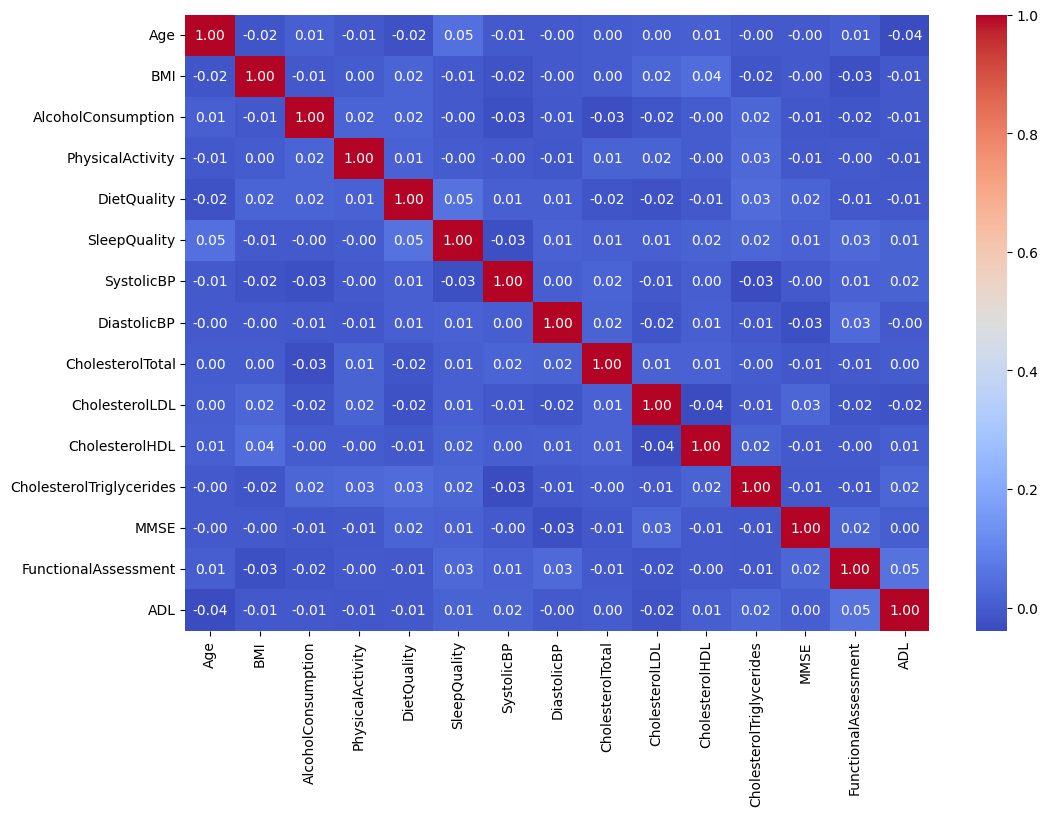

In [39]:
corr_matrix = df[non_categorical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig("img/dataset-correlation.png")

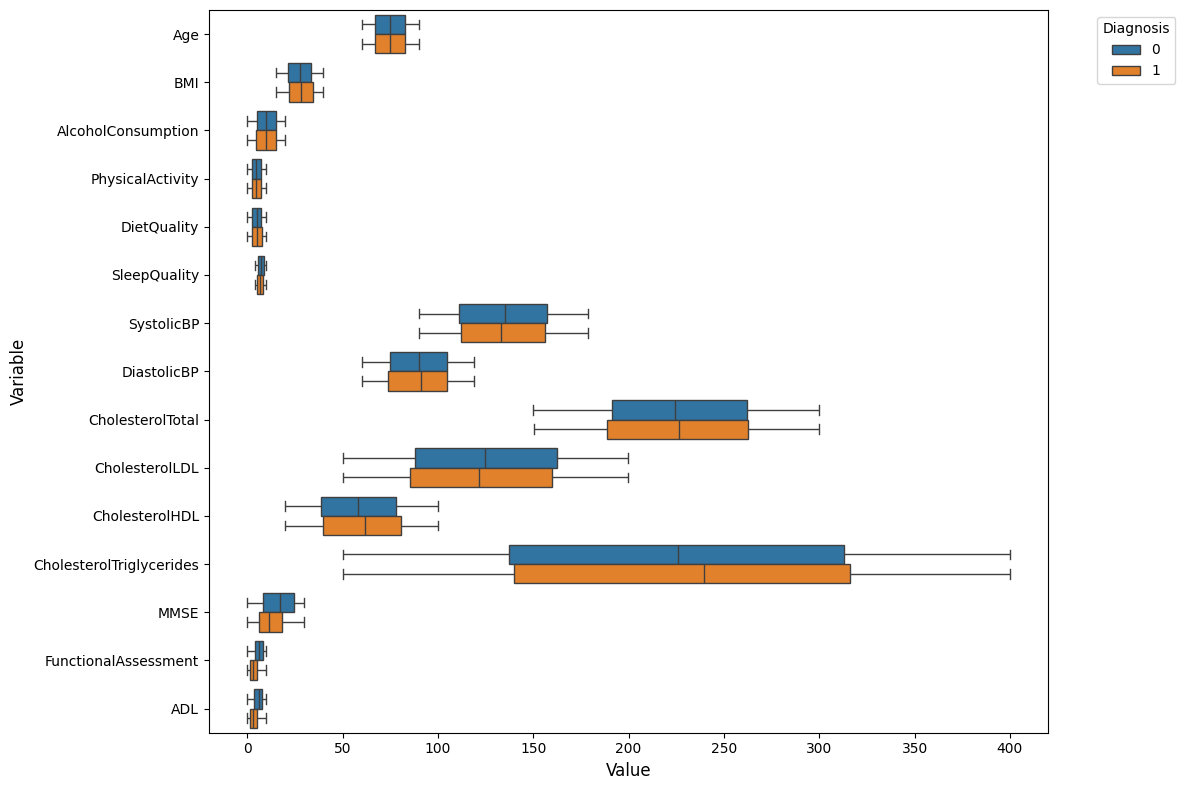

In [44]:
melted_df = df.melt(id_vars='Diagnosis', value_vars=non_categorical_columns, 
                    var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, y='Variable', x='Value', hue='Diagnosis', orient='h')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("img/dataset-dispersion.png")

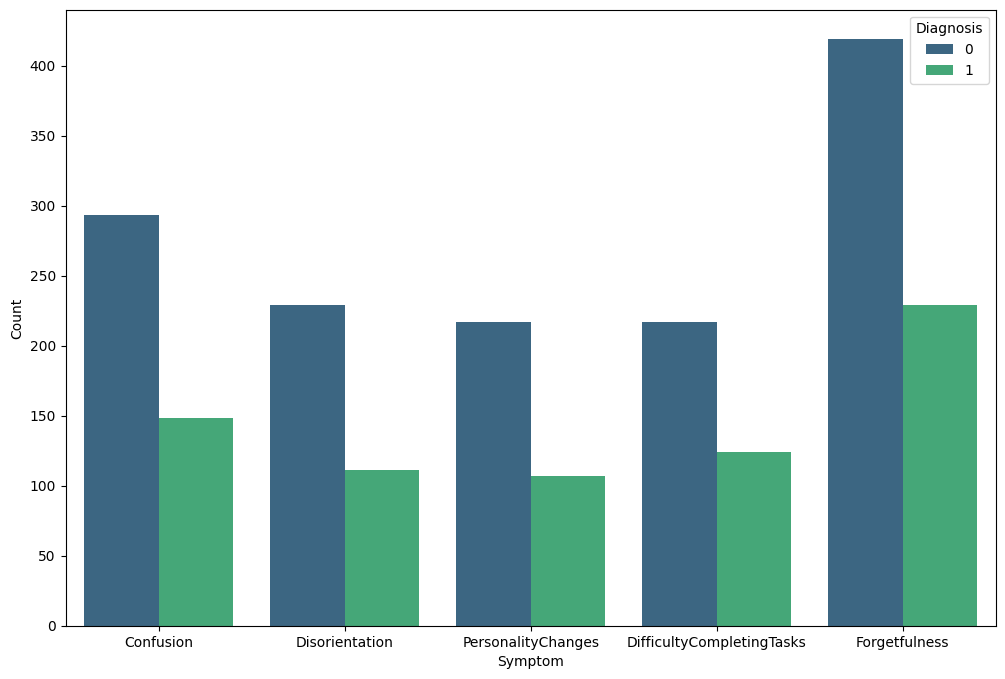

In [55]:
symptoms = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

melted_symptoms_df = df.melt(id_vars='Diagnosis', value_vars=symptoms, 
                             var_name='Symptom', value_name='Presence')

melted_symptoms_df = melted_symptoms_df[melted_symptoms_df['Presence'] == 1]

plt.figure(figsize=(12, 8))
sns.countplot(data=melted_symptoms_df, x='Symptom', hue='Diagnosis', palette='viridis')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.xticks(rotation=0)
plt.savefig("img/dataset-symptoms.png")

### Null and Outliers
Se puede ver que no hay nulos ni outliers

In [19]:
null_counts = df.isnull().sum()
null_counts

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

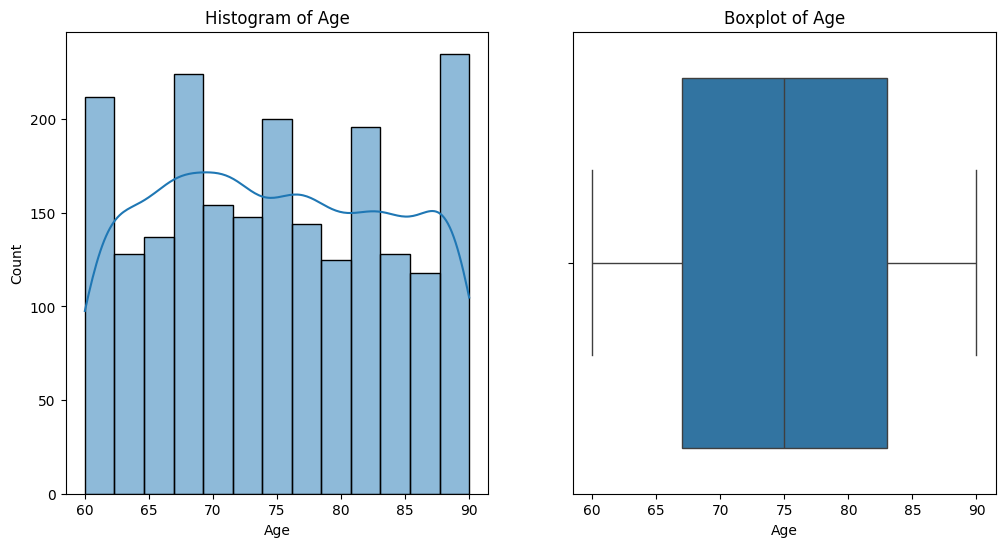

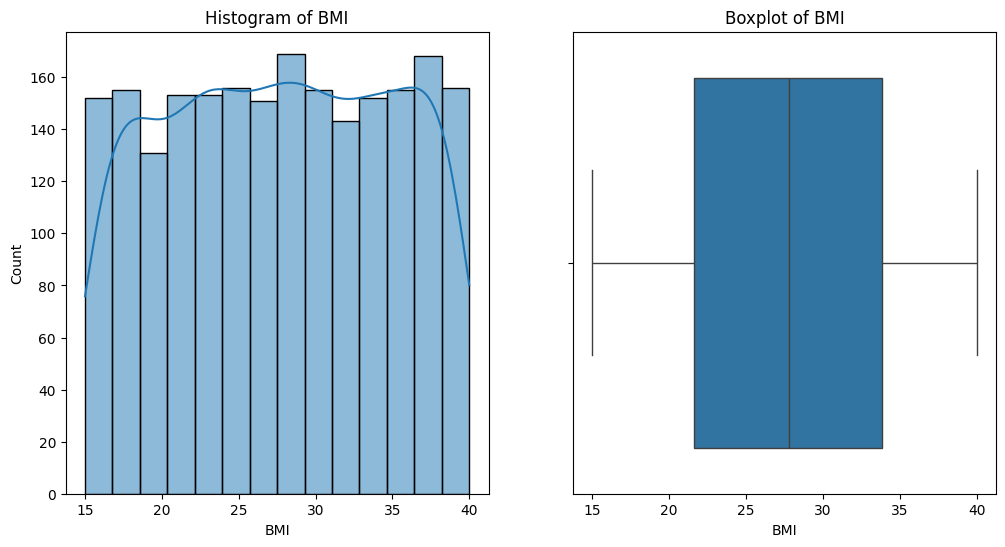

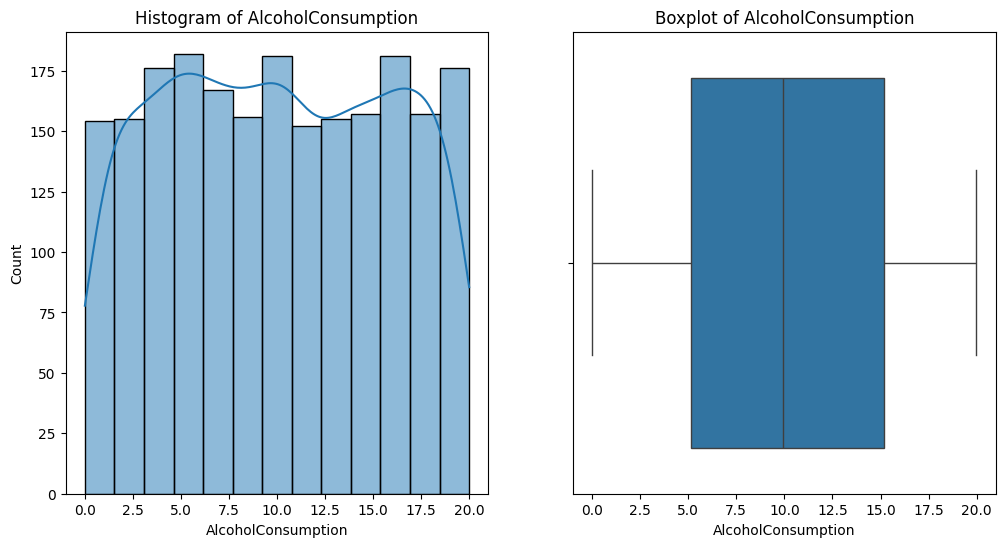

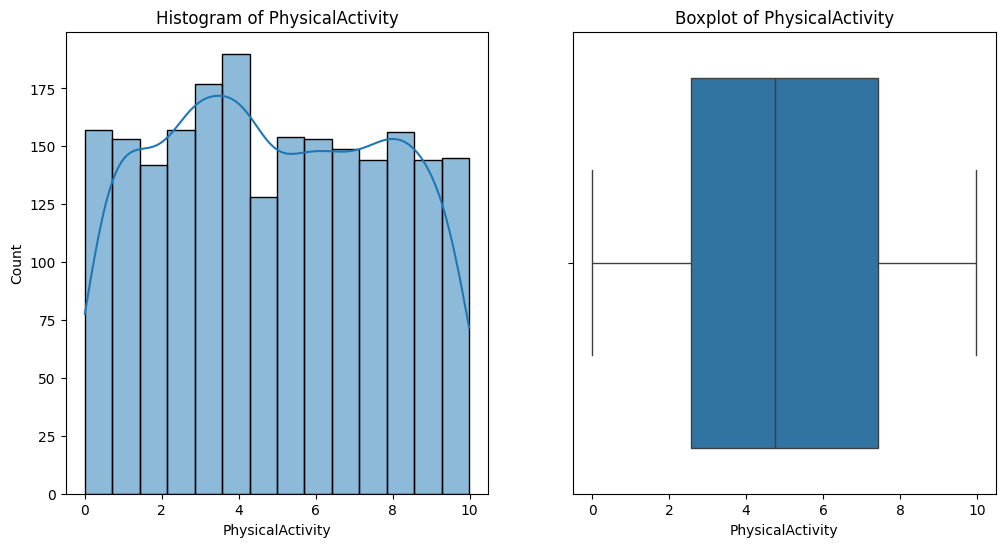

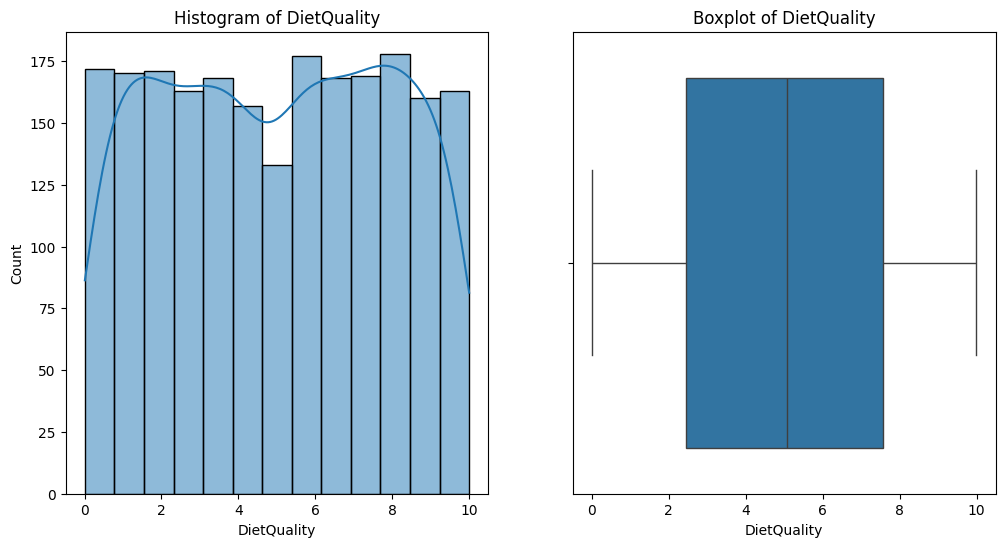

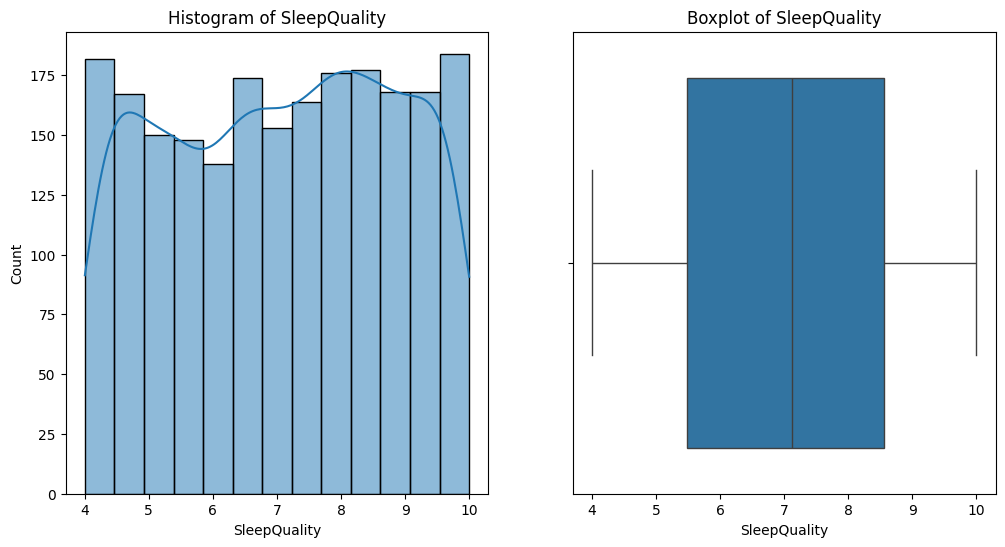

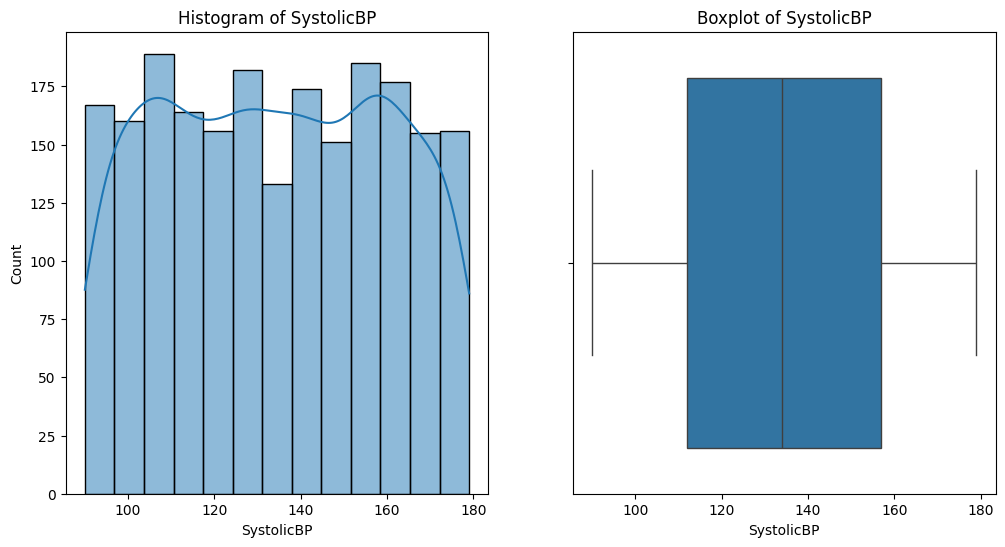

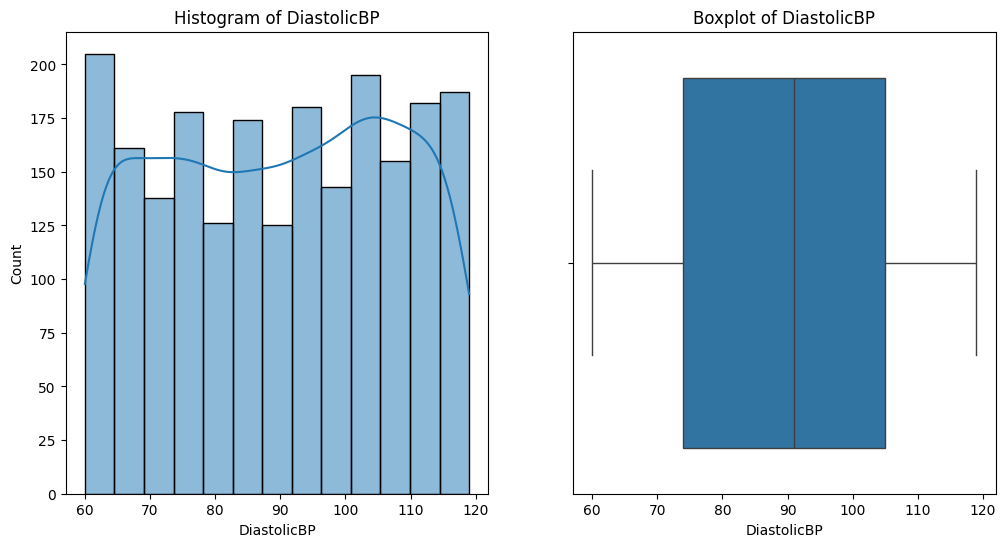

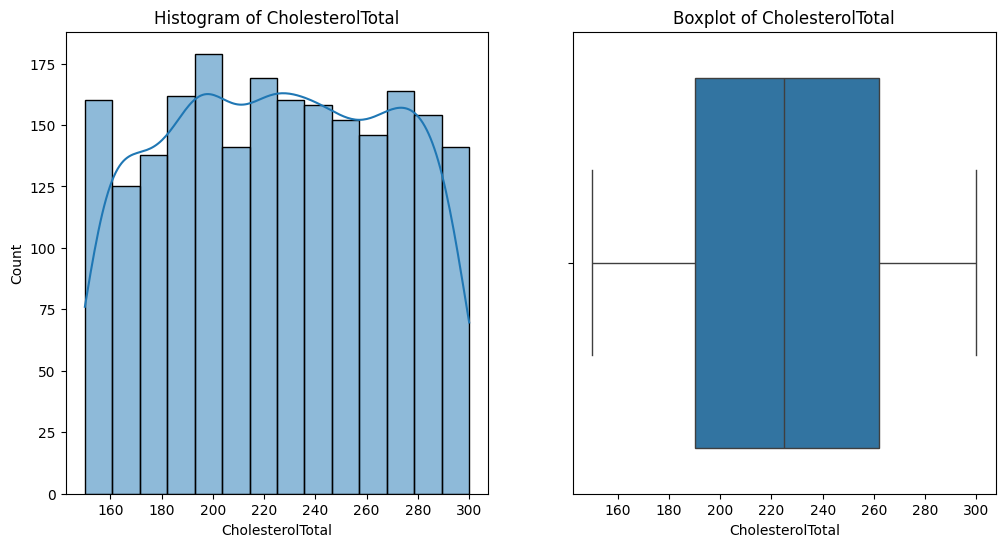

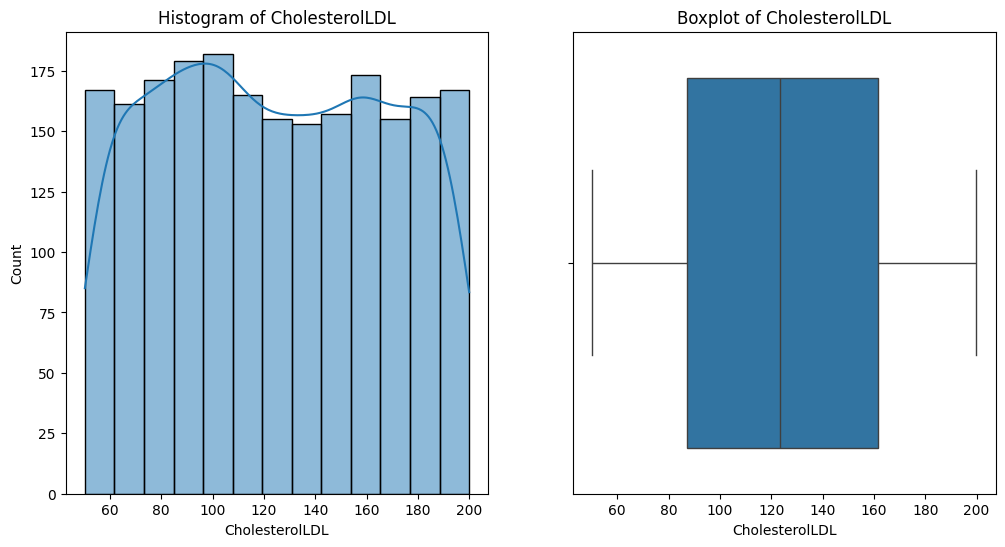

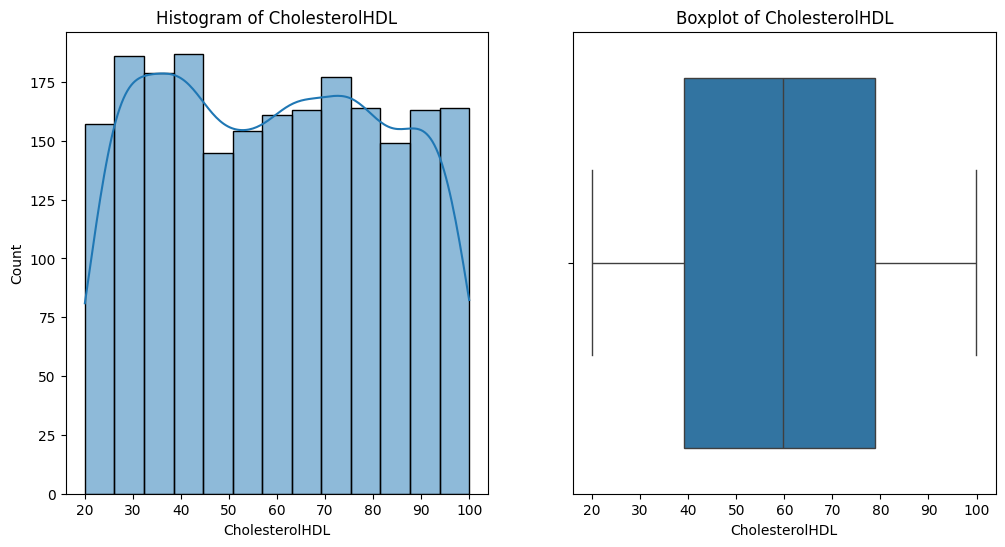

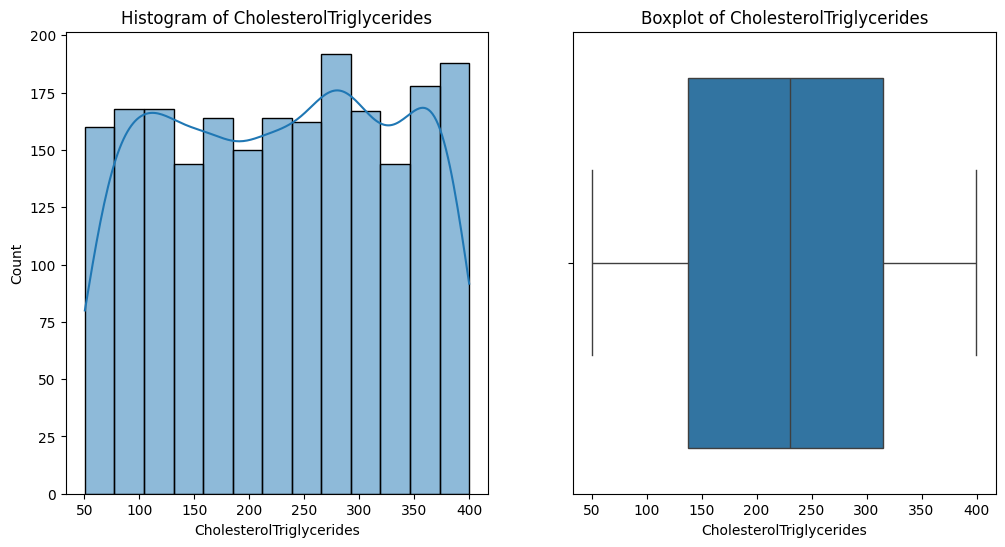

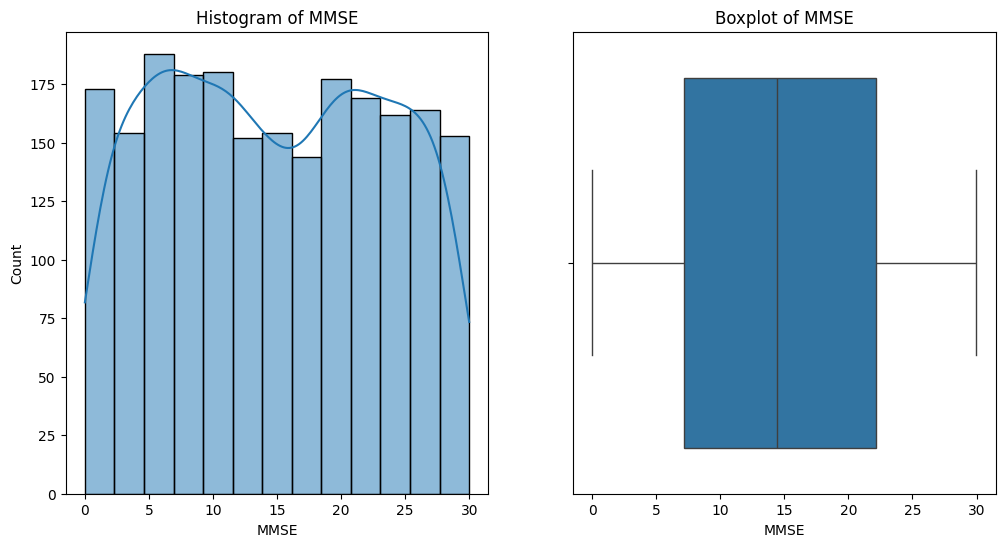

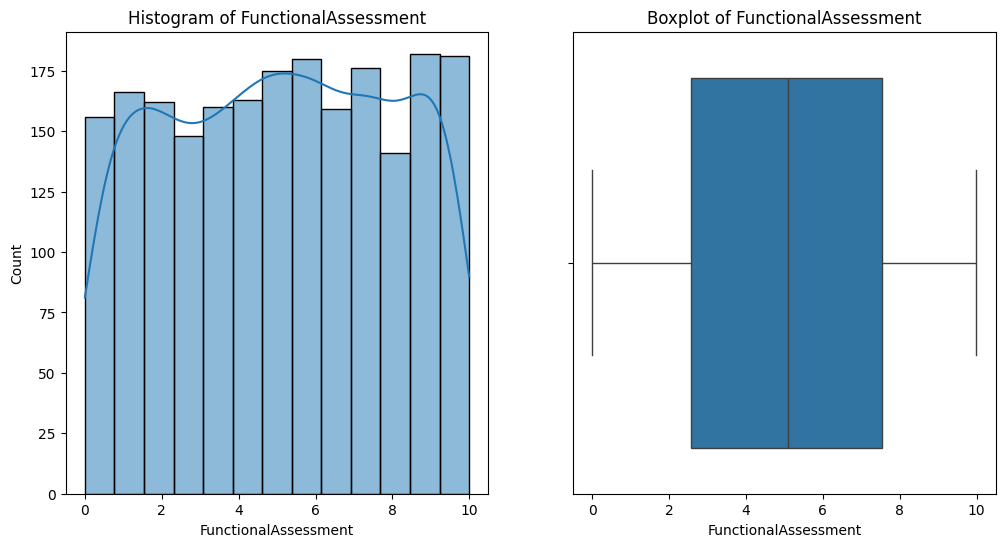

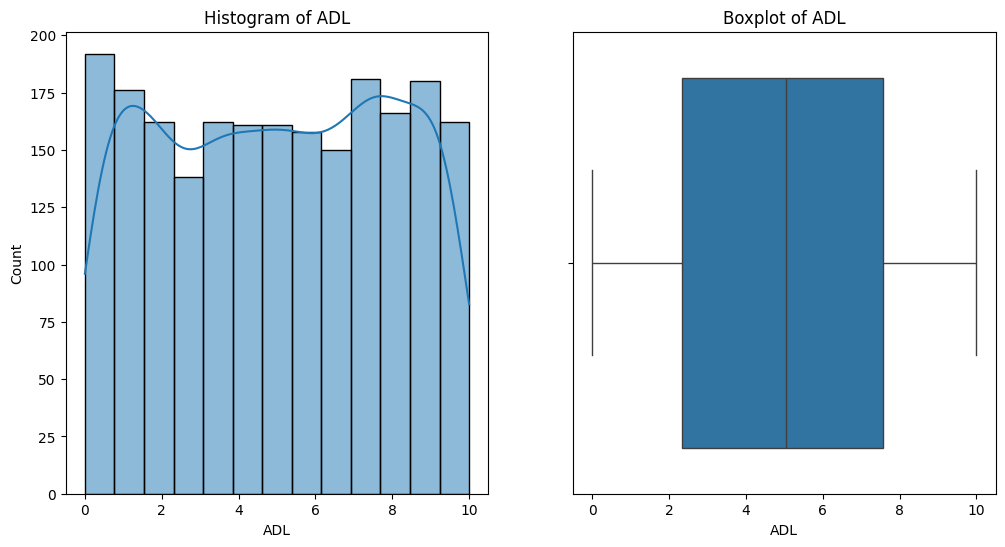

In [20]:
for column in numeric_columns:
    if df[column].nunique() <= 10:
        continue
    
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()

## Estandarizacion

In [21]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[non_categorical_columns] = scaler.fit_transform(df_scaled[non_categorical_columns])
df_scaled.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.1250,0,0,2,-0.399415,0,0.335672,0.321310,-0.731127,0.620236,...,0.285992,0,0,-0.632431,0,0,0,1,0,0
1,0.8750,0,0,0,-0.081270,0,-0.538214,0.587461,-0.893562,0.011575,...,0.406420,0,0,-0.467019,0,0,0,0,1,0
2,-0.1250,0,3,1,-0.818057,0,0.960327,0.633805,-0.637185,0.830625,...,0.160748,0,0,0.397158,0,1,0,1,0,0
3,-0.0625,1,0,1,0.487577,1,0.227074,0.753834,0.462635,0.414644,...,0.777133,0,1,0.275310,0,0,0,0,0,0
4,0.8750,0,0,0,-0.579763,0,0.850453,0.317881,-0.839303,-0.493066,...,0.190857,0,0,-0.959079,0,0,1,1,0,0


In [22]:
df_scaled = pd.get_dummies(df_scaled, columns=["Ethnicity",'EducationLevel'])
df_scaled = df_scaled.apply(lambda x: x.astype(int) if "Ethnicity" in x.name or "EducationLevel" in x.name else x)
numeric_columns = numeric_columns.drop('Ethnicity')
numeric_columns = numeric_columns.drop('EducationLevel')

# Reduce the weight of ethnicity by scaling down its values
# ethnicity_columns = [col for col in df_scaled.columns if "Ethnicity" in col]
# df_scaled[ethnicity_columns] = df_scaled[ethnicity_columns] * 0.5

# Reduce the weight of education level by scaling down its values
# education_columns = [col for col in df_scaled.columns if "EducationLevel" in col]
# df_scaled[education_columns] = df_scaled[education_columns] * 0.5

df_scaled.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
0,-0.1250,0,-0.399415,0,0.335672,0.321310,-0.731127,0.620236,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.8750,0,-0.081270,0,-0.538214,0.587461,-0.893562,0.011575,0,0,...,1,0,1,0,0,0,1,0,0,0
2,-0.1250,0,-0.818057,0,0.960327,0.633805,-0.637185,0.830625,1,0,...,0,0,0,0,0,1,0,1,0,0
3,-0.0625,1,0.487577,1,0.227074,0.753834,0.462635,0.414644,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.8750,0,-0.579763,0,0.850453,0.317881,-0.839303,-0.493066,0,0,...,0,0,1,0,0,0,1,0,0,0


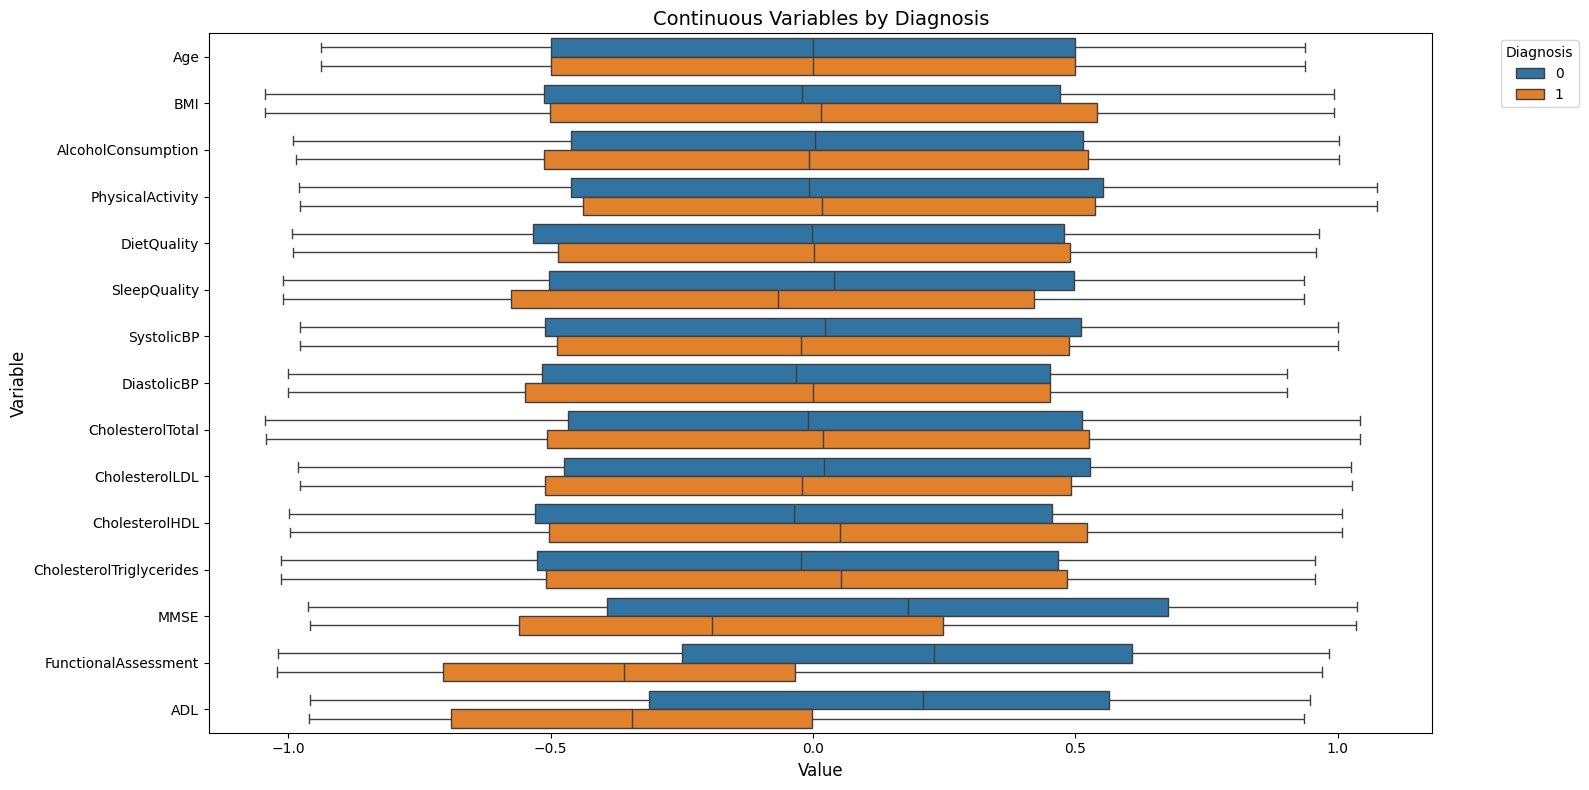

In [23]:
melted_df = df_scaled.melt(id_vars='Diagnosis', value_vars=non_categorical_columns, 
                    var_name='Variable', value_name='Value')
plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_df, y='Variable', x='Value', hue='Diagnosis', orient='h')
plt.title('Continuous Variables by Diagnosis', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

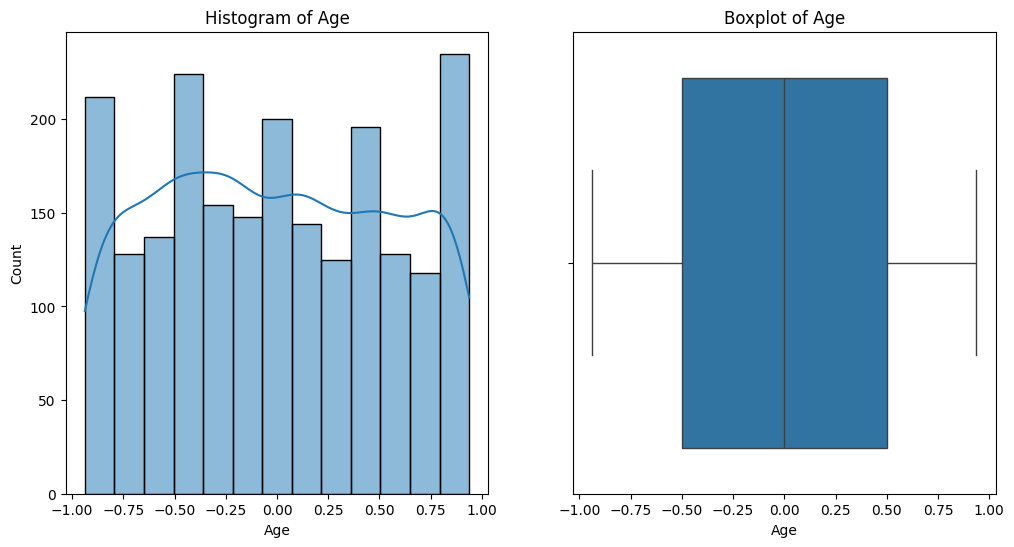

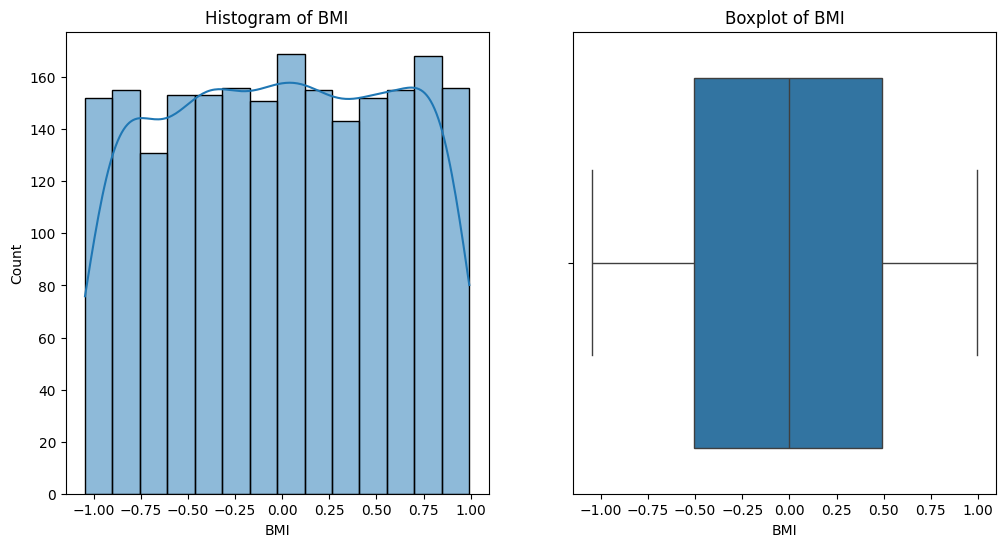

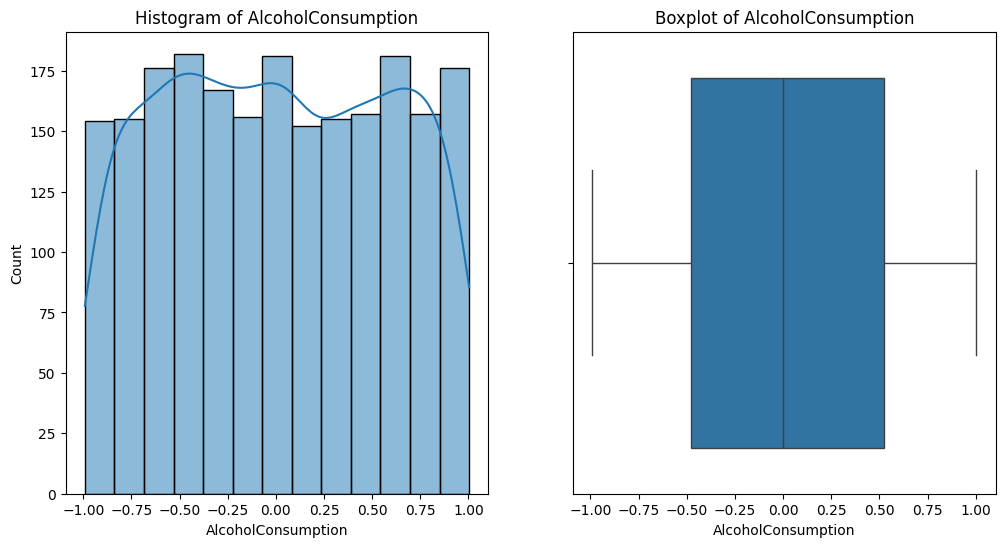

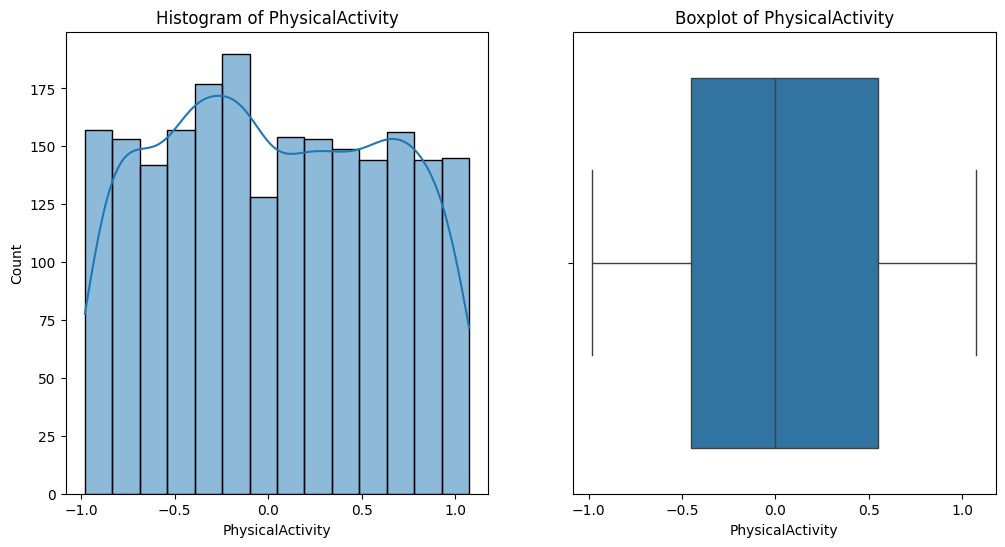

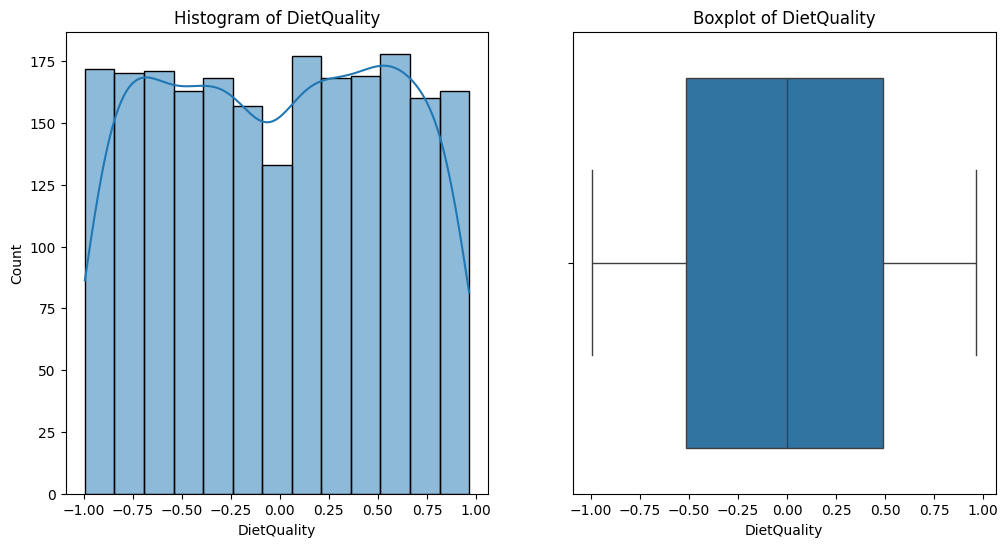

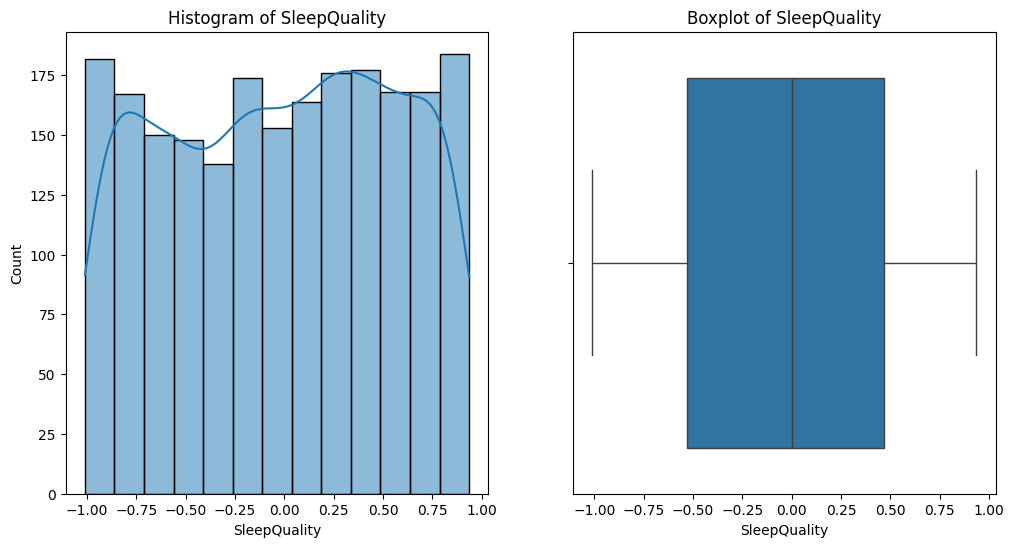

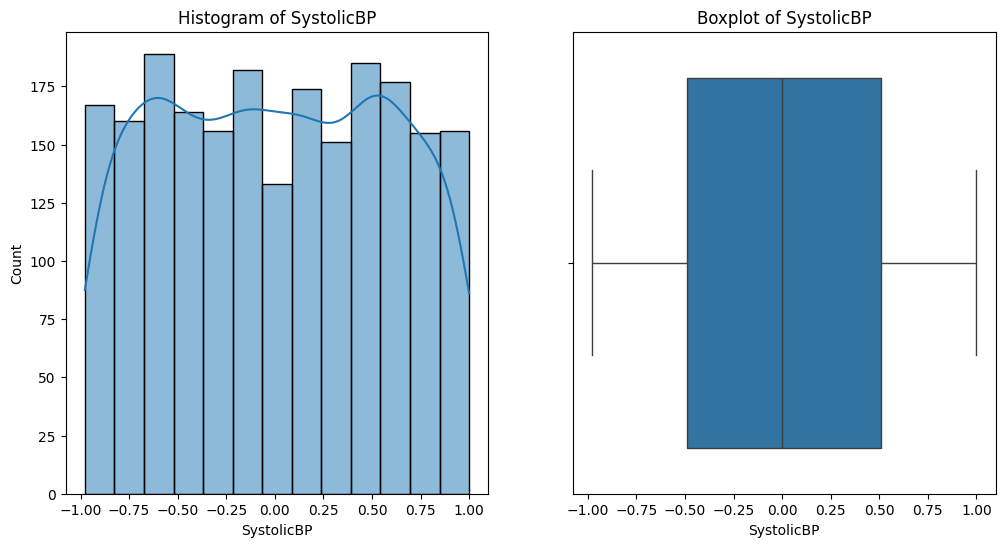

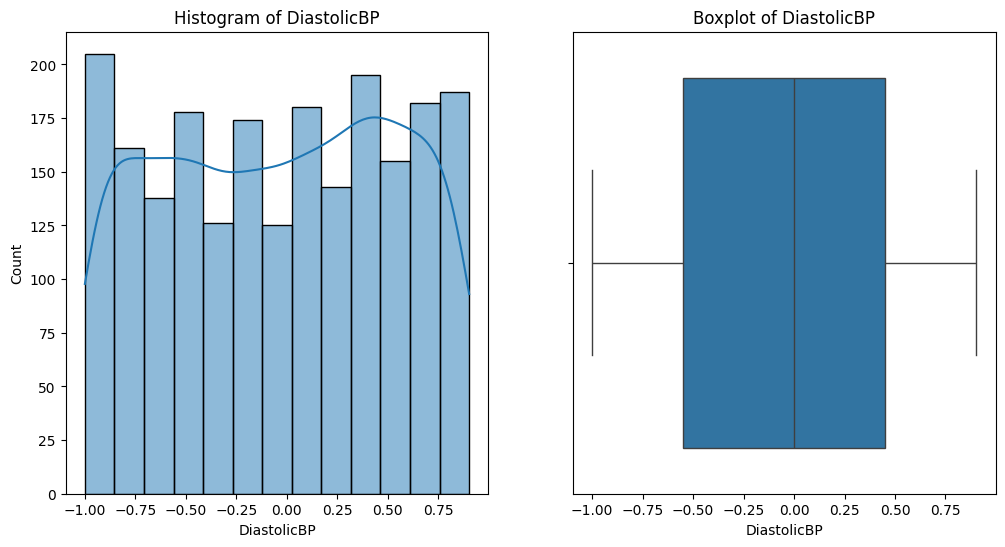

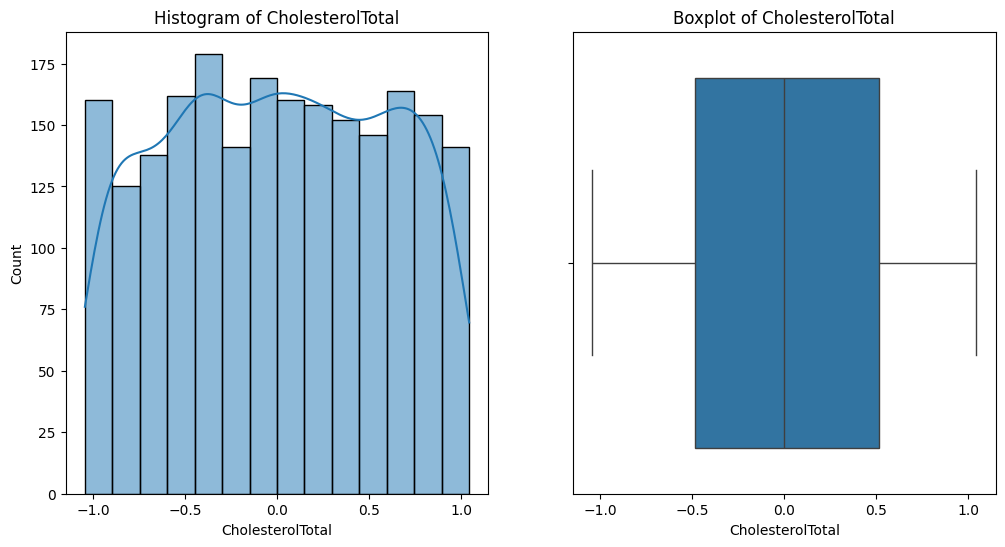

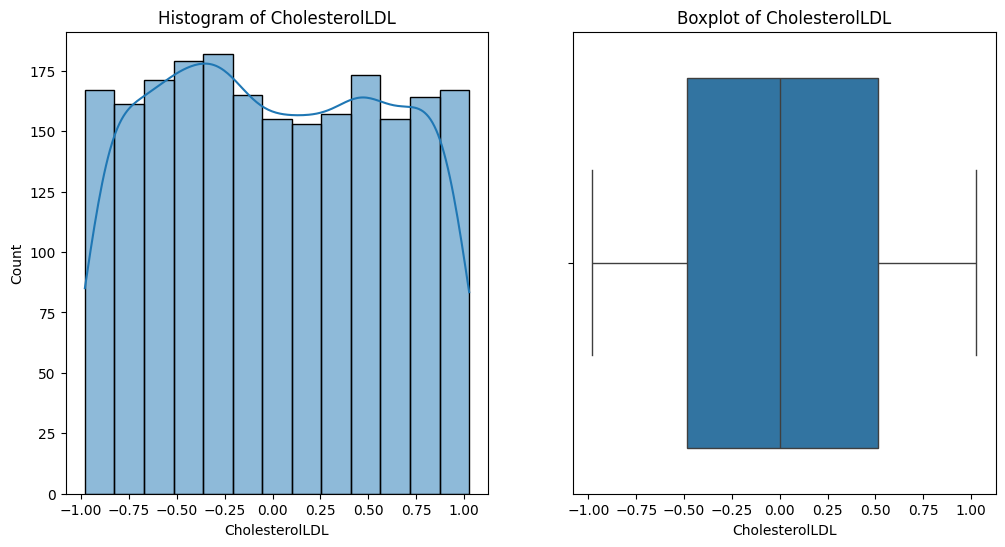

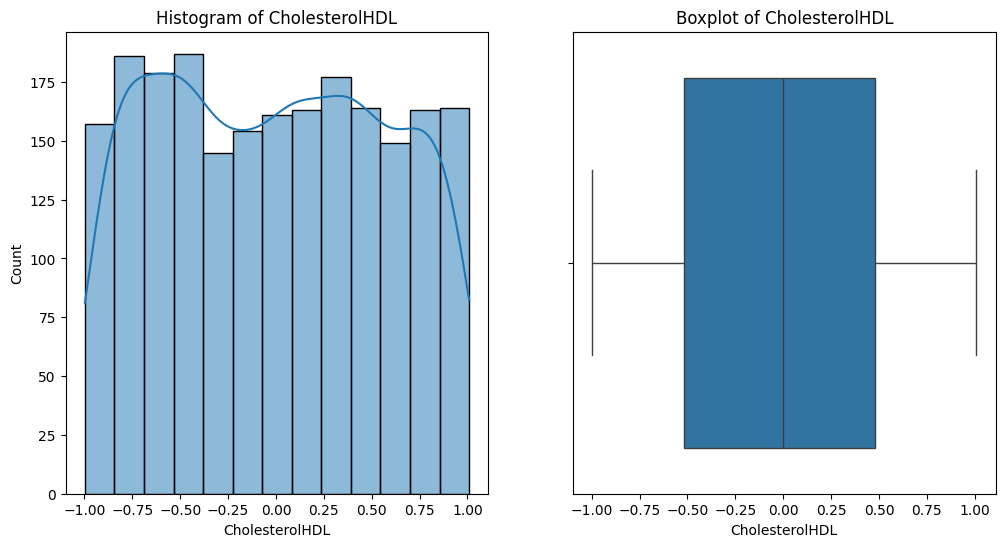

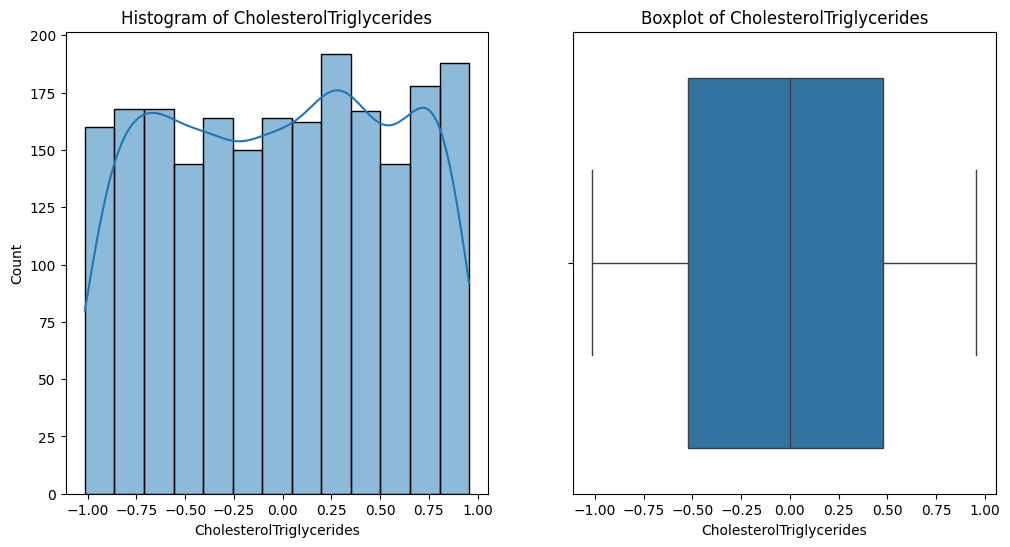

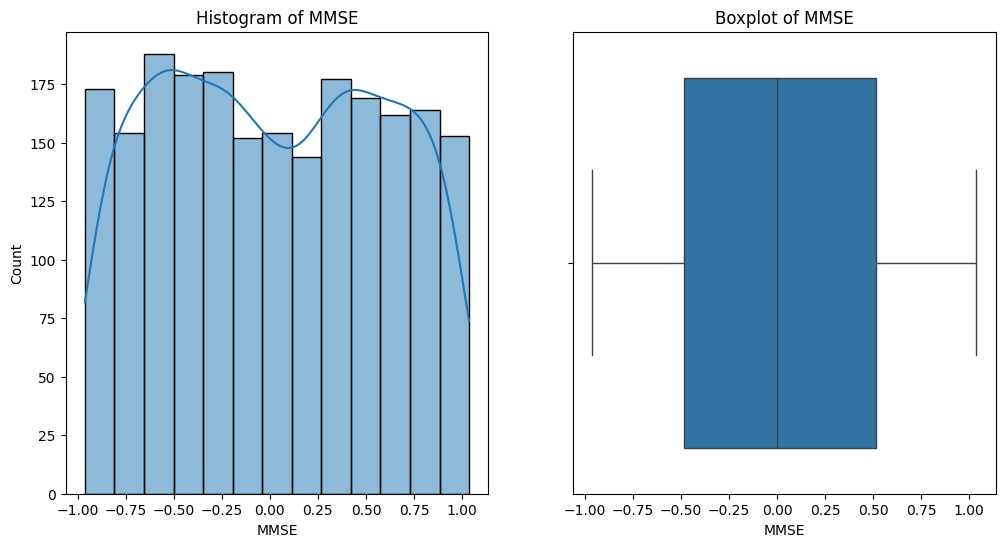

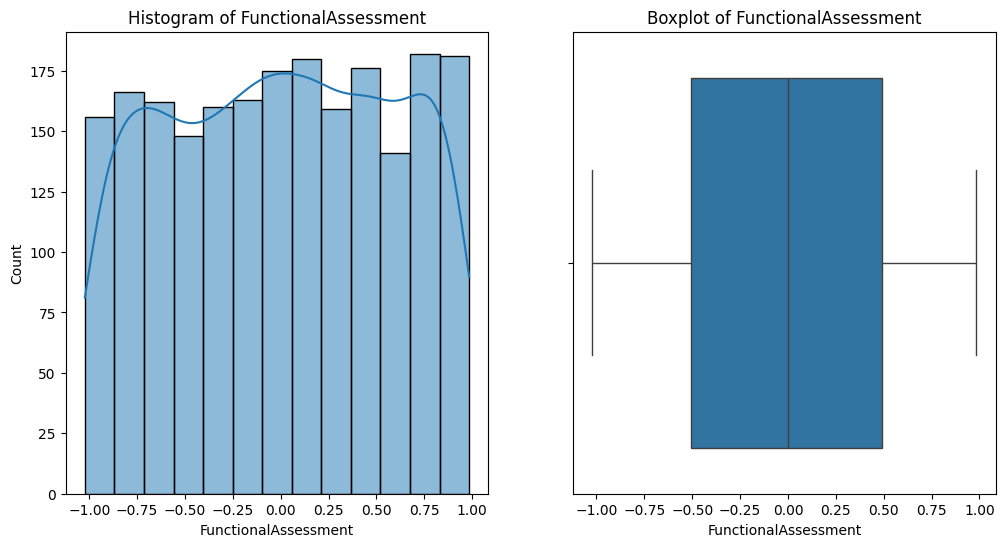

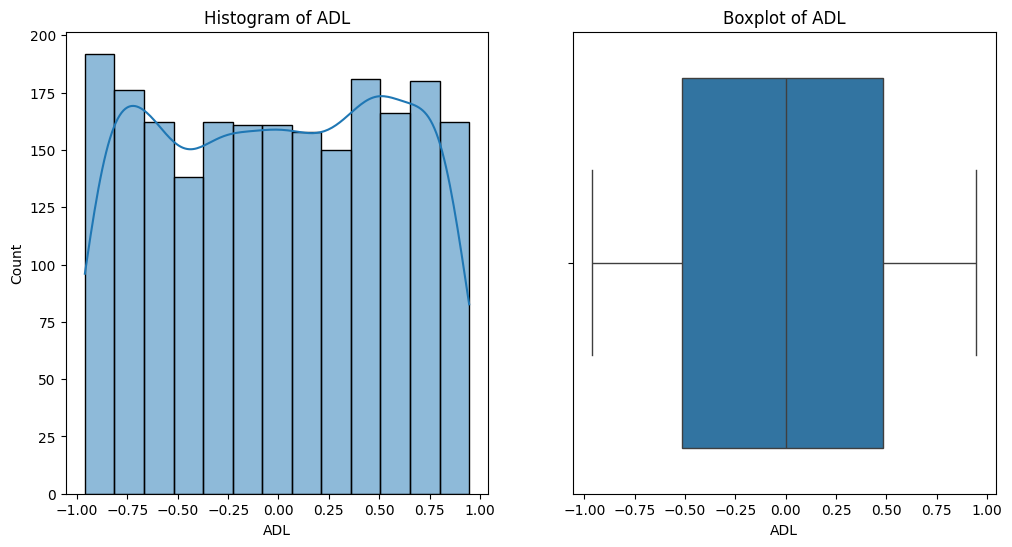

In [24]:
for column in numeric_columns:
    if df_scaled[column].nunique() <= 10:
        continue
    
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()

## Reduccion dimensionalidad y plots

In [25]:
num_samples = 500

### Escalado

In [26]:
sample_df = df_scaled[df_scaled['Diagnosis'] == 1].sample(n=num_samples, random_state=42)
sample_df = pd.concat([sample_df, df_scaled[df_scaled['Diagnosis'] == 0].sample(n=num_samples, random_state=42)])
sample_df

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
1136,-0.7500,1,0.256563,0,-0.089761,0.973152,0.808240,-0.627870,0,0,...,0,1,1,0,0,0,0,0,1,0
968,0.8750,1,0.900796,0,-0.130749,1.050646,-0.138436,-0.070076,0,1,...,0,1,0,0,0,1,0,1,0,0
302,0.8125,1,-0.830162,0,-0.870544,-0.683564,0.181683,0.111913,0,0,...,0,1,1,0,0,0,0,1,0,0
1427,-0.3125,1,0.578492,0,-0.771058,0.963602,-0.959732,0.846968,0,0,...,0,1,1,0,0,0,0,1,0,0
341,-0.1250,0,-0.314898,0,0.060050,-0.945946,-0.756861,0.448506,0,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.3750,1,0.725929,0,0.400498,-0.444167,-0.899503,-0.993591,0,0,...,1,0,0,0,1,0,0,0,1,0
871,-0.6250,0,-0.468964,1,-0.459570,-0.529517,-0.875230,-0.931563,0,0,...,1,0,1,0,0,0,1,0,0,0
1950,-0.0625,1,-0.484309,1,-0.165451,0.320787,0.113309,-0.888588,1,0,...,0,0,1,0,0,0,0,0,0,1
1498,0.1250,1,-0.185938,0,-0.177914,-0.631516,0.403164,-0.518066,0,0,...,0,0,1,0,0,0,0,0,1,0


In [57]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_df[non_categorical_columns])
sample_df['PCA1'] = pca_result[:, 0]
sample_df['PCA2'] = pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(sample_df[non_categorical_columns])
sample_df['tSNE1'] = tsne_result[:, 0]
sample_df['tSNE2'] = tsne_result[:, 1]

# UMAP
umap_reducer = UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(sample_df[non_categorical_columns])
sample_df['UMAP1'] = umap_result[:, 0]
sample_df['UMAP2'] = umap_result[:, 1]

sample_df[['PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'UMAP1', 'UMAP2']]

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,PCA1,PCA2,tSNE1,tSNE2,UMAP1,UMAP2
1136,-166.440511,10.767239,-47.750183,3.460391,12.409945,3.165882
968,-99.263263,83.251887,-32.211258,18.146160,11.069880,7.182278
302,16.382776,4.992296,-7.105518,-2.438858,7.002600,3.319138
1427,-64.682520,38.402650,-26.406038,11.666952,10.509628,6.371849
341,114.624719,66.003684,31.751743,10.154230,3.426067,3.821430
...,...,...,...,...,...,...
952,-162.586295,-14.436764,-48.531197,-2.287440,11.872808,2.892171
871,153.120557,46.414213,35.110725,14.448439,3.203981,4.591980
1950,-9.180861,23.646380,1.678679,-2.611579,6.541169,6.057462
1498,-99.779903,-15.577573,-30.643335,-13.159846,10.554800,3.338830


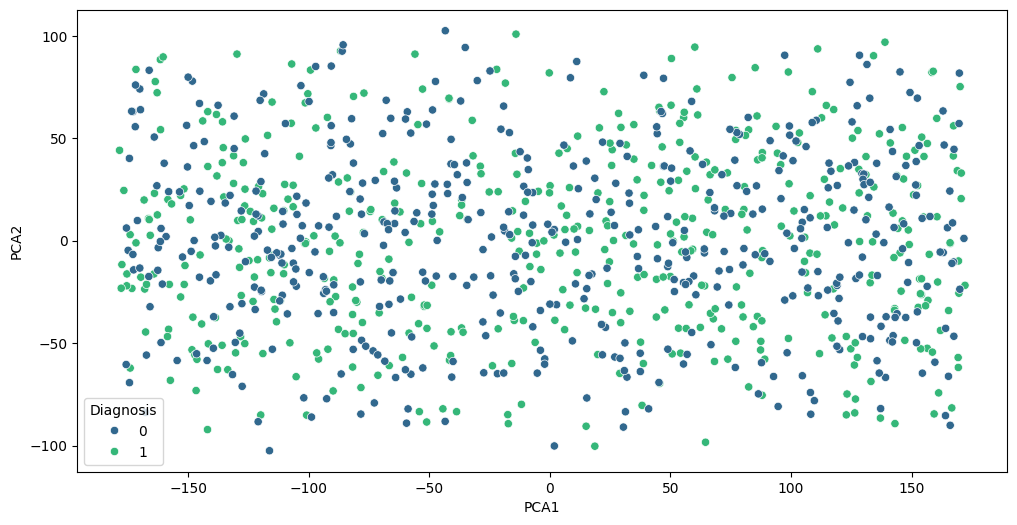

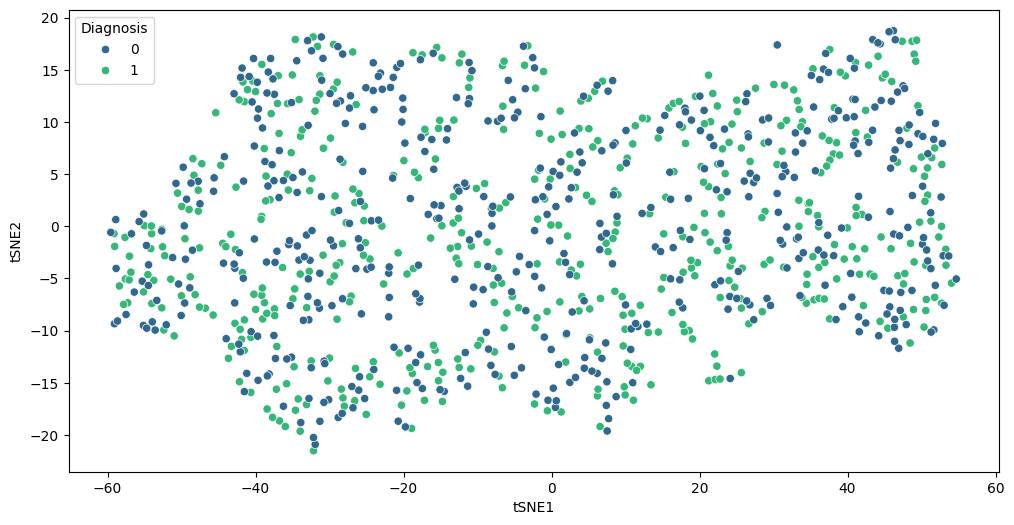

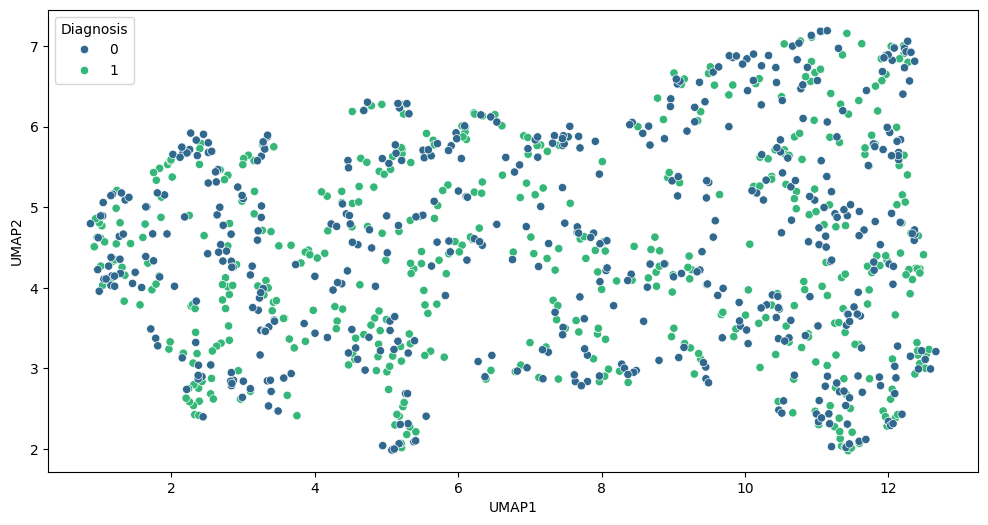

In [59]:
# Plot PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Diagnosis')
plt.savefig("img/dataset-pca.png")

# Plot t-SNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Diagnosis')
plt.savefig("img/dataset-tsne.png")

# Plot UMAP
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Diagnosis')
plt.savefig("img/dataset-umap.png")

### Sin escalar

In [29]:
sample_df = df[df['Diagnosis'] == 1].sample(n=num_samples, random_state=42)
sample_df = pd.concat([sample_df, df[df['Diagnosis'] == 0].sample(n=num_samples, random_state=42)])
sample_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1136,63,1,0,2,30.968972,0,9.035177,9.493290,9.198248,5.182105,...,4.926871,1,0,2.189451,0,0,0,1,0,1
968,89,1,3,1,38.866212,0,8.624554,9.869697,4.370038,6.899846,...,0.106858,0,0,1.717920,0,0,0,0,0,1
302,88,1,0,1,17.647486,0,1.213194,1.446167,6.002699,7.460286,...,0.639074,0,1,9.091783,0,1,0,0,0,1
1427,70,1,0,1,34.915286,0,2.209861,9.446902,0.181290,9.723903,...,8.204003,0,1,2.463838,0,0,0,0,0,1
341,73,0,0,2,23.963788,0,10.535998,0.171707,1.215965,8.496832,...,3.764659,0,0,4.487289,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,81,1,2,2,36.722636,0,13.946655,2.608986,0.488469,4.055860,...,8.135324,0,1,7.039078,0,0,1,0,1,0
871,65,0,0,0,22.075186,1,5.330385,2.194416,0.612264,4.246876,...,7.616932,0,0,8.044446,0,0,0,0,1,0
1950,74,1,0,3,21.887089,1,8.276900,6.324575,5.653982,4.379219,...,3.273413,0,0,3.230333,0,0,0,0,0,0
1498,77,1,0,2,25.544633,0,8.152047,1.698978,7.132292,5.520250,...,7.083353,0,0,9.627490,1,0,0,0,0,0


In [30]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_df[non_categorical_columns])
sample_df['PCA1'] = pca_result[:, 0]
sample_df['PCA2'] = pca_result[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(sample_df[non_categorical_columns])
sample_df['tSNE1'] = tsne_result[:, 0]
sample_df['tSNE2'] = tsne_result[:, 1]

# UMAP
umap_reducer = UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(sample_df[non_categorical_columns])
sample_df['UMAP1'] = umap_result[:, 0]
sample_df['UMAP2'] = umap_result[:, 1]

sample_df[['PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'UMAP1', 'UMAP2']]

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,PCA1,PCA2,tSNE1,tSNE2,UMAP1,UMAP2
1136,-166.440511,10.767239,-47.750183,3.460391,12.409945,3.165882
968,-99.263263,83.251887,-32.211258,18.146160,11.069880,7.182278
302,16.382776,4.992296,-7.105518,-2.438858,7.002600,3.319138
1427,-64.682520,38.402650,-26.406038,11.666952,10.509628,6.371849
341,114.624719,66.003684,31.751743,10.154230,3.426067,3.821430
...,...,...,...,...,...,...
952,-162.586295,-14.436764,-48.531197,-2.287440,11.872808,2.892171
871,153.120557,46.414213,35.110725,14.448439,3.203981,4.591980
1950,-9.180861,23.646380,1.678679,-2.611579,6.541169,6.057462
1498,-99.779903,-15.577573,-30.643335,-13.159846,10.554800,3.338830


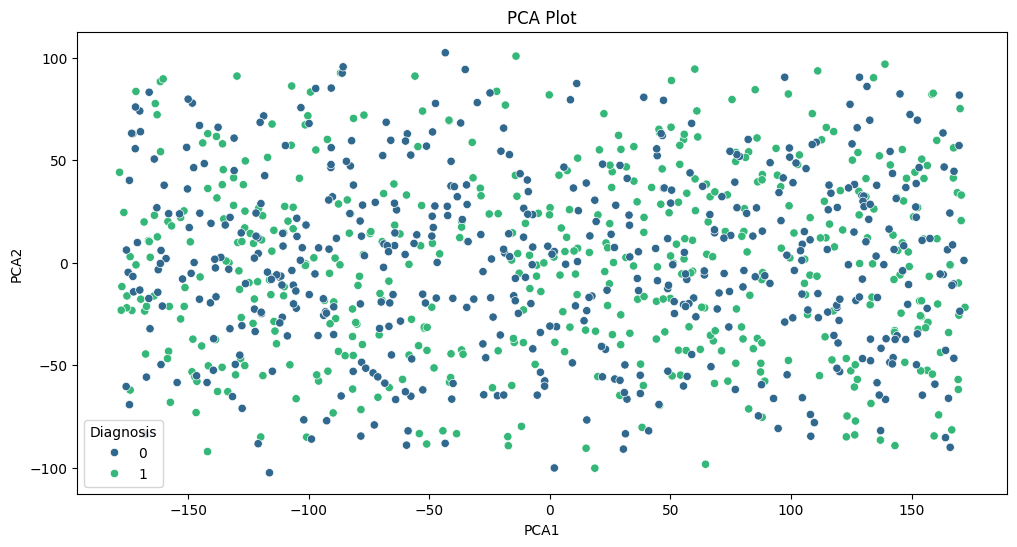

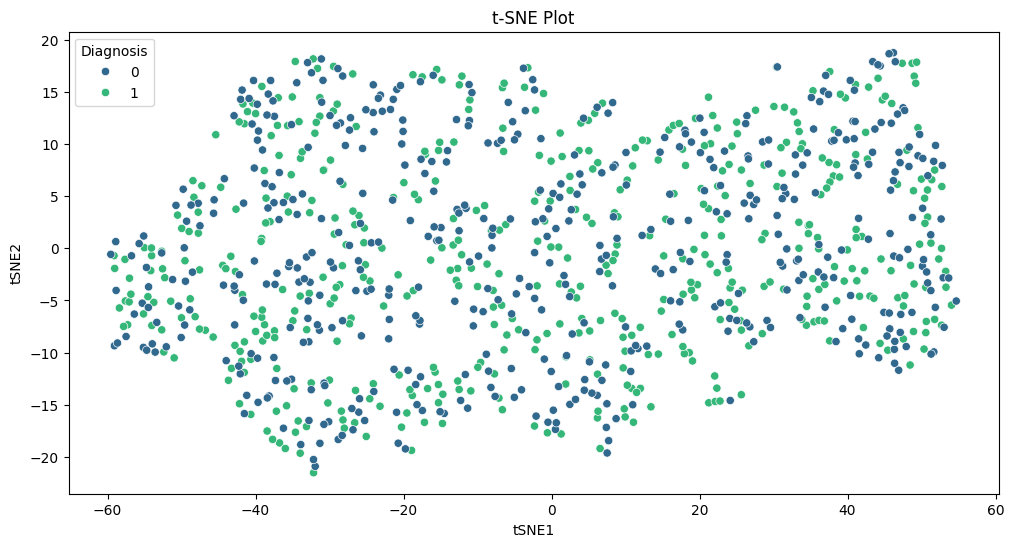

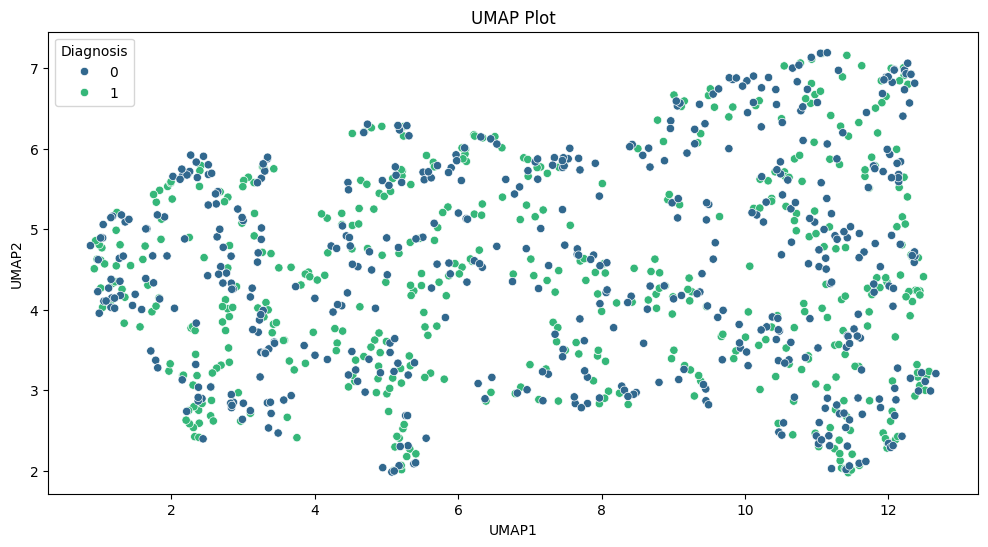

In [31]:
# Plot PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.title('PCA Plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Diagnosis')
plt.show()

# Plot t-SNE
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.title('t-SNE Plot')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Diagnosis')
plt.show()

# Plot UMAP
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Diagnosis', data=sample_df, palette='viridis')
plt.title('UMAP Plot')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Diagnosis')
plt.show()

## Export

In [32]:
df_export = df_scaled.copy()

### Balancing

In [33]:
def undersample(df, target_column):
    print(df.shape)
    print(f"Count of {target_column} 1:", df[df[target_column] == 1].shape[0])
    print(f"Count of {target_column} 0:", df[df[target_column] == 0].shape[0])
    df_positive = df[df[target_column] == 1]
    df_negative = df[df[target_column] == 0]

    if df_positive.shape[0] > df_negative.shape[0]:
        df_positive = df_positive.sample(df_negative.shape[0], random_state=42)
    else:
        df_negative = df_negative.sample(df_positive.shape[0], random_state=42)
    
    print(df.shape)
    print(f"Count of {target_column} 1:", df[df[target_column] == 1].shape[0])
    print(f"Count of {target_column} 0:", df[df[target_column] == 0].shape[0])
    
    export = pd.concat([df_positive, df_negative], axis=0).reset_index(drop=True)

    return export.drop(columns=[target_column]), export[target_column]

In [34]:
X, y = undersample(df_export, 'Diagnosis')

(2149, 39)
Count of Diagnosis 1: 760
Count of Diagnosis 0: 1389
(2149, 39)
Count of Diagnosis 1: 760
Count of Diagnosis 0: 1389


In [35]:
X.to_csv("data/processed/X_scaled.csv", index=False)
y.to_csv("data/processed/y.csv", index=False)

In [36]:
X, y = undersample(df, 'Diagnosis')

(2149, 33)
Count of Diagnosis 1: 760
Count of Diagnosis 0: 1389
(2149, 33)
Count of Diagnosis 1: 760
Count of Diagnosis 0: 1389


In [37]:
X.to_csv("data/processed/X.csv", index=False)